## Analyzing NYC High Schools Data ##

The goal of the this analysis is to establish connection between students' SAT (Scholastic Aptitude Test) scores and many factors that may or may not contribute to the outcome of the test taking.

Datasets used:

- **SAT Scored by School** (SAT scores for each high school in NYC) - `sat_results.csv`
- **School Attendance** (Attendance information for each school in NYC) - `hs_directory`
- **Class Size** (Information on class size for each school) - `class_size.csv`
- **AP Test Results** (Advanced Placement exam results for each high school) - `ap-2010.csv`
- **Graduation outcomes** (The percentage of students who graduate and other info) - `graduation.csv`
- **Demographics** (Demographic information for each school) - `demographics.csv`
- **School Survey** (Survey of parents, teachers and studets at each school) - `all_survey.txt`, `d75_survey.txt`

In [1]:
import pandas as pd
import numpy as np

data_files = ["ap_2010.csv",
              "class_size.csv",
              "demographics.csv",
              "graduation.csv",
              "hs_directory.csv",
              "sat_results.csv"]

data = {}
for file in data_files:
    file_data = pd.read_csv(f'schools/{file}')
    file_name = file.replace('.csv', '')
    data[file_name] = file_data

data['sat_results']

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384
...,...,...,...,...,...,...
473,75X012,P.S. X012 LEWIS AND CLARK SCHOOL,s,s,s,s
474,75X754,J. M. RAPPORT SCHOOL CAREER DEVELOPMENT,s,s,s,s
475,79M645,SCHOOL FOR COOPERATIVE TECHNICAL EDUCATION,s,s,s,s
476,79Q950,GED PLUS s CITYWIDE,8,496,400,426


In [2]:
pd.set_option('display.max_columns', 58)

In [3]:
data['ap_2010'].head(1)

,DBN,SchoolName,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5
0,01M448,UNIVERSITY NEIGHBORHOOD H.S.,39,49,10


In [4]:
data['class_size'].head(1)

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN


In [5]:
data['demographics'].head(1)

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,grade3,grade4,grade5,grade6,grade7,grade8,grade9,grade10,grade11,grade12,ell_num,ell_percent,sped_num,sped_percent,ctt_num,selfcontained_num,asian_num,asian_per,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
0,01M015,P.S. 015 ROBERTO CLEMENTE,20052006,89.4,NaN,281,15,36,40,33,38,52,29,38,NaN,NaN,NaN,NaN,NaN,NaN,36.0,12.8,57.0,20.3,25,9,10,3.6,74,26.3,189,67.3,5,1.8,158.0,56.2,123.0,43.8


In [6]:
data['graduation'].head(1)

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,Advanced Regents - n,Advanced Regents - % of cohort,Advanced Regents - % of grads,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2003,5,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s


In [7]:
data['hs_directory'].head(1)

,dbn,school_name,boro,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,bus,subway,primary_address_line_1,city,state_code,zip,website,total_students,campus_name,school_type,overview_paragraph,program_highlights,language_classes,advancedplacement_courses,online_ap_courses,online_language_courses,extracurricular_activities,psal_sports_boys,psal_sports_girls,psal_sports_coed,school_sports,partner_cbo,partner_hospital,partner_highered,partner_cultural,partner_nonprofit,partner_corporate,partner_financial,partner_other,addtl_info1,addtl_info2,start_time,end_time,se_services,ell_programs,school_accessibility_description,number_programs,priority01,priority02,priority03,priority04,priority05,priority06,priority07,priority08,priority09,priority10,Location 1
0,17K548,Brooklyn School for Music & Theatre,Brooklyn,K440,718-230-6250,718-230-6262,9,12,NaN,NaN,"B41, B43, B44-SBS, B45, B48, B49, B69","2, 3, 4, 5, F, S to Botanic Garden ; B, Q to P...",883 Classon Avenue,Brooklyn,NY,11225,Bkmusicntheatre.com,399.0,Prospect Heights Educational Campus,NaN,Brooklyn School for Music & Theatre (BSMT) use...,We offer highly competitive positions in our D...,Spanish,"English Language and Composition, United State...",NaN,NaN,"Variety of clubs: Chess, The Step Team, Fashio...","Baseball, Basketball & JV Basketball, Cross Co...","Basketball, Cross Country, Indoor Track, Outdo...",NaN,NaN,F.Y.R.EZONE (Finding Your Rhythm thru Educatio...,NaN,NaN,"In 2002, Roundabout Theatre was selected by Ne...",One To World‘s Global Classroom connects New Y...,NaN,NaN,NaN,NaN,NaN,8:10 AM,3:00 PM,This school will provide students with disabil...,ESL,Functionally Accessible,1,Priority to Brooklyn students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"883 Classon Avenue\nBrooklyn, NY 11225\n(40.67..."


In [8]:
# loading additional data
all_survey = pd.read_csv('schools/survey_all.txt', delimiter='\t', encoding='Windows-1252')
d75_survey = pd.read_csv('schools/survey_d75.txt', delimiter='\t', encoding='Windows-1252')

all_survey.head(1)

,dbn,bn,schoolname,d75,studentssurveyed,highschool,schooltype,rr_s,rr_t,rr_p,N_s,N_t,N_p,nr_s,nr_t,nr_p,saf_p_11,com_p_11,eng_p_11,aca_p_11,saf_t_11,com_t_11,eng_t_11,aca_t_11,saf_s_11,com_s_11,eng_s_11,aca_s_11,saf_tot_11,...,s_N_q13g_4,s_N_q14a_1,s_N_q14a_2,s_N_q14a_3,s_N_q14a_4,s_N_q14b_1,s_N_q14b_2,s_N_q14b_3,s_N_q14b_4,s_N_q14c_1,s_N_q14c_2,s_N_q14c_3,s_N_q14c_4,s_N_q14d_1,s_N_q14d_2,s_N_q14d_3,s_N_q14d_4,s_N_q14e_1,s_N_q14e_2,s_N_q14e_3,s_N_q14e_4,s_N_q14f_1,s_N_q14f_2,s_N_q14f_3,s_N_q14f_4,s_N_q14g_1,s_N_q14g_2,s_N_q14g_3,s_N_q14g_4
0,01M015,M015,P.S. 015 Roberto Clemente,0,No,0.0,Elementary School,NaN,88,60,NaN,22.0,90.0,0,25,150,8.5,7.6,7.5,7.8,7.5,7.8,7.6,7.9,NaN,NaN,NaN,NaN,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
d75_survey.head(1)

,dbn,bn,schoolname,d75,studentssurveyed,highschool,schooltype,rr_s,rr_t,rr_p,N_s,N_t,N_p,nr_s,nr_t,nr_p,saf_p_11,com_p_11,eng_p_11,aca_p_11,saf_t_11,com_t_11,eng_t_11,aca_t_11,saf_s_11,com_s_11,eng_s_11,aca_s_11,saf_tot_11,...,s_q13c_3,s_q13c_4,s_q13d_1,s_q13d_2,s_q13d_3,s_q13d_4,s_q13e_1,s_q13e_2,s_q13e_3,s_q13e_4,s_q13f_1,s_q13f_2,s_q13f_3,s_q13f_4,s_q13g_1,s_q13g_2,s_q13g_3,s_q13g_4,s_q14_1,s_q14_2,s_q14_3,s_q14_4,s_q14_5,s_q14_6,s_q14_7,s_q14_8,s_q14_9,s_q14_10,s_q14_11
0,75K004,K004,P.S. K004,1,Yes,0.0,District 75 Special Education,38.0,90,72,8.0,81,244,21,90,337,9.1,8.6,8.4,8.5,7.4,6.6,6.4,6.4,7.6,5.8,7.6,6.3,8.0,...,0.0,0.0,0.0,86.0,14.0,0.0,0.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,71.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# concatinating the additional data
survey = pd.concat([all_survey, d75_survey], axis=0)
survey.head()

,dbn,bn,schoolname,d75,studentssurveyed,highschool,schooltype,rr_s,rr_t,rr_p,N_s,N_t,N_p,nr_s,nr_t,nr_p,saf_p_11,com_p_11,eng_p_11,aca_p_11,saf_t_11,com_t_11,eng_t_11,aca_t_11,saf_s_11,com_s_11,eng_s_11,aca_s_11,saf_tot_11,...,s_q11c_3,s_q11c_4,s_q12d_1,s_q12d_2,s_q12d_3,s_q12d_4,s_q12e_1,s_q12e_2,s_q12e_3,s_q12e_4,s_q12f_1,s_q12f_2,s_q12f_3,s_q12f_4,s_q12g_1,s_q12g_2,s_q12g_3,s_q12g_4,s_q14_1,s_q14_2,s_q14_3,s_q14_4,s_q14_5,s_q14_6,s_q14_7,s_q14_8,s_q14_9,s_q14_10,s_q14_11
0,01M015,M015,P.S. 015 Roberto Clemente,0,No,0.0,Elementary School,NaN,88,60,NaN,22.0,90.0,0,25,150,8.5,7.6,7.5,7.8,7.5,7.8,7.6,7.9,NaN,NaN,NaN,NaN,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01M019,M019,P.S. 019 Asher Levy,0,No,0.0,Elementary School,NaN,100,60,NaN,34.0,161.0,0,33,269,8.4,7.6,7.6,7.8,8.6,8.5,8.9,9.1,NaN,NaN,NaN,NaN,8.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01M020,M020,P.S. 020 Anna Silver,0,No,0.0,Elementary School,NaN,88,73,NaN,42.0,367.0,0,48,505,8.9,8.3,8.3,8.6,7.6,6.3,6.8,7.5,NaN,NaN,NaN,NaN,8.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01M034,M034,P.S. 034 Franklin D. Roosevelt,0,Yes,0.0,Elementary / Middle School,89.0,73,50,145.0,29.0,151.0,163,40,301,8.8,8.2,8.0,8.5,7.0,6.2,6.8,7.8,6.2,5.9,6.5,7.4,7.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01M063,M063,P.S. 063 William McKinley,0,No,0.0,Elementary School,NaN,100,60,NaN,23.0,90.0,0,23,151,8.7,7.9,8.1,7.9,8.4,7.3,7.8,8.1,NaN,NaN,NaN,NaN,8.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# using data dictionary from the source website to decide which columns to remove
data_dict = pd.read_excel('schools/Survey_Data_Dictionary.xls')
data_dict

,2011 NYC School Survey\nData Dictionary,Unnamed: 1
0,This data dictionary can be used with the scho...,NaN
1,NaN,NaN
2,Field Name,Field Description
3,dbn,School identification code (district borough n...
4,sch_type,"School type (Elementary, Middle, High, etc)"
5,location,School name
6,enrollment,Enrollment size
7,borough,Borough
8,principal,Principal name
9,studentsurvey,Only students in grades 6-12 partipate in the ...


In [12]:
# renaming 'dbn' column to 'DBN'
survey['DBN'] = survey['dbn']

# keeping only relevant columns
relevant_cols = ["DBN", "rr_s", "rr_t", "rr_p", "N_s", "N_t", "N_p", "saf_p_11", "com_p_11", "eng_p_11", "aca_p_11", "saf_t_11",
                "com_t_11", "eng_t_11", "aca_t_11", "saf_s_11", "com_s_11", "eng_s_11", "aca_s_11", "saf_tot_11", "com_tot_11",
                "eng_tot_11", "aca_tot_11"]
survey = survey.loc[:, relevant_cols]

# adding 'survey' to 'data' 
data['survey'] = survey

In [13]:
data['survey'].head()

,DBN,rr_s,rr_t,rr_p,N_s,N_t,N_p,saf_p_11,com_p_11,eng_p_11,aca_p_11,saf_t_11,com_t_11,eng_t_11,aca_t_11,saf_s_11,com_s_11,eng_s_11,aca_s_11,saf_tot_11,com_tot_11,eng_tot_11,aca_tot_11
0,01M015,NaN,88,60,NaN,22.0,90.0,8.5,7.6,7.5,7.8,7.5,7.8,7.6,7.9,NaN,NaN,NaN,NaN,8.0,7.7,7.5,7.9
1,01M019,NaN,100,60,NaN,34.0,161.0,8.4,7.6,7.6,7.8,8.6,8.5,8.9,9.1,NaN,NaN,NaN,NaN,8.5,8.1,8.2,8.4
2,01M020,NaN,88,73,NaN,42.0,367.0,8.9,8.3,8.3,8.6,7.6,6.3,6.8,7.5,NaN,NaN,NaN,NaN,8.2,7.3,7.5,8.0
3,01M034,89.0,73,50,145.0,29.0,151.0,8.8,8.2,8.0,8.5,7.0,6.2,6.8,7.8,6.2,5.9,6.5,7.4,7.3,6.7,7.1,7.9
4,01M063,NaN,100,60,NaN,23.0,90.0,8.7,7.9,8.1,7.9,8.4,7.3,7.8,8.1,NaN,NaN,NaN,NaN,8.5,7.6,7.9,8.0


In [14]:
# 'class_size' doesn't have DBN column, but does have values it needs to make one (CSD and SCHOOL CODE)

# adding 0 in front of one-digit long numbers ('1' -> zfill(2) -> '01')
def pad_csd(num):
    return str(num).zfill(2)

data['class_size']['padded_csd'] = data['class_size']['CSD'].apply(pad_csd)
data['class_size']['DBN'] = data['class_size']['padded_csd'] + data['class_size']['SCHOOL CODE']

data['class_size'].head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd,DBN
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN,01,01M015
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN,01,01M015
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN,01,01M015


In [15]:
# renaming 'dbn' in data['hs_directory']
data['hs_directory']['DBN'] = data['hs_directory']['dbn'] 

data['hs_directory'].head(1)

,dbn,school_name,boro,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,bus,subway,primary_address_line_1,city,state_code,zip,website,total_students,campus_name,school_type,overview_paragraph,program_highlights,language_classes,advancedplacement_courses,online_ap_courses,online_language_courses,extracurricular_activities,psal_sports_boys,psal_sports_girls,...,school_sports,partner_cbo,partner_hospital,partner_highered,partner_cultural,partner_nonprofit,partner_corporate,partner_financial,partner_other,addtl_info1,addtl_info2,start_time,end_time,se_services,ell_programs,school_accessibility_description,number_programs,priority01,priority02,priority03,priority04,priority05,priority06,priority07,priority08,priority09,priority10,Location 1,DBN
0,17K548,Brooklyn School for Music & Theatre,Brooklyn,K440,718-230-6250,718-230-6262,9,12,NaN,NaN,"B41, B43, B44-SBS, B45, B48, B49, B69","2, 3, 4, 5, F, S to Botanic Garden ; B, Q to P...",883 Classon Avenue,Brooklyn,NY,11225,Bkmusicntheatre.com,399.0,Prospect Heights Educational Campus,NaN,Brooklyn School for Music & Theatre (BSMT) use...,We offer highly competitive positions in our D...,Spanish,"English Language and Composition, United State...",NaN,NaN,"Variety of clubs: Chess, The Step Team, Fashio...","Baseball, Basketball & JV Basketball, Cross Co...","Basketball, Cross Country, Indoor Track, Outdo...",...,NaN,F.Y.R.EZONE (Finding Your Rhythm thru Educatio...,NaN,NaN,"In 2002, Roundabout Theatre was selected by Ne...",One To World‘s Global Classroom connects New Y...,NaN,NaN,NaN,NaN,NaN,8:10 AM,3:00 PM,This school will provide students with disabil...,ESL,Functionally Accessible,1,Priority to Brooklyn students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"883 Classon Avenue\nBrooklyn, NY 11225\n(40.67...",17K548


In [16]:
# combining SAT scores for critical reading, math and writing sections of the exam into one number

# converting column values into numerics 
sat_columns = ['SAT Critical Reading Avg. Score', 'SAT Math Avg. Score', 'SAT Writing Avg. Score']
for col in sat_columns:
    # strings that pd_numeric can't convert will be treated as NaN (errors='coerce')
    data['sat_results'][col] = pd.to_numeric(data['sat_results'][col], errors='coerce')
    
data['sat_results']['sat_score'] = data['sat_results'][sat_columns[0]] + data['sat_results'][sat_columns[1]] + data['sat_results'][sat_columns[2]]

In [17]:
data['sat_results']

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0
3,01M458,FORSYTH SATELLITE ACADEMY,7,414.0,401.0,359.0,1174.0
4,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0
...,...,...,...,...,...,...,...
473,75X012,P.S. X012 LEWIS AND CLARK SCHOOL,s,NaN,NaN,NaN,NaN
474,75X754,J. M. RAPPORT SCHOOL CAREER DEVELOPMENT,s,NaN,NaN,NaN,NaN
475,79M645,SCHOOL FOR COOPERATIVE TECHNICAL EDUCATION,s,NaN,NaN,NaN,NaN
476,79Q950,GED PLUS s CITYWIDE,8,496.0,400.0,426.0,1322.0


In [18]:
# parsing lat and long values in 'hs_directory' (extracting coordinates at the end)
data['hs_directory']['Location 1'][0]

'883 Classon Avenue\nBrooklyn, NY 11225\n(40.67029890700047, -73.96164787599963)'

In [19]:
import re

# parsing latitude
def find_lat(loc):
    coords = re.findall("\(.+\)", loc)
    lat = coords[0].split(',')[0].replace('(','')
    return lat

# parsing longitude
def find_lon(loc):
    coords = re.findall("\(.+\)", loc)
    lat = coords[0].split(',')[1].replace(')','').strip()
    return lat

# applying
data['hs_directory']['lat'] = data['hs_directory']['Location 1'].apply(find_lat)
data['hs_directory']['lon'] = data['hs_directory']['Location 1'].apply(find_lon)

# converting 'lat' and 'lon' column values to numbers
data['hs_directory']['lat'] = pd.to_numeric(data['hs_directory']['lat'], errors='coerce')
data['hs_directory']['lon'] = pd.to_numeric(data['hs_directory']['lon'], errors='coerce')

data['hs_directory'].head()

,dbn,school_name,boro,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,bus,subway,primary_address_line_1,city,state_code,zip,website,total_students,campus_name,school_type,overview_paragraph,program_highlights,language_classes,advancedplacement_courses,online_ap_courses,online_language_courses,extracurricular_activities,psal_sports_boys,psal_sports_girls,...,partner_hospital,partner_highered,partner_cultural,partner_nonprofit,partner_corporate,partner_financial,partner_other,addtl_info1,addtl_info2,start_time,end_time,se_services,ell_programs,school_accessibility_description,number_programs,priority01,priority02,priority03,priority04,priority05,priority06,priority07,priority08,priority09,priority10,Location 1,DBN,lat,lon
0,17K548,Brooklyn School for Music & Theatre,Brooklyn,K440,718-230-6250,718-230-6262,9,12,NaN,NaN,"B41, B43, B44-SBS, B45, B48, B49, B69","2, 3, 4, 5, F, S to Botanic Garden ; B, Q to P...",883 Classon Avenue,Brooklyn,NY,11225,Bkmusicntheatre.com,399.0,Prospect Heights Educational Campus,NaN,Brooklyn School for Music & Theatre (BSMT) use...,We offer highly competitive positions in our D...,Spanish,"English Language and Composition, United State...",NaN,NaN,"Variety of clubs: Chess, The Step Team, Fashio...","Baseball, Basketball & JV Basketball, Cross Co...","Basketball, Cross Country, Indoor Track, Outdo...",...,NaN,NaN,"In 2002, Roundabout Theatre was selected by Ne...",One To World‘s Global Classroom connects New Y...,NaN,NaN,NaN,NaN,NaN,8:10 AM,3:00 PM,This school will provide students with disabil...,ESL,Functionally Accessible,1,Priority to Brooklyn students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"883 Classon Avenue\nBrooklyn, NY 11225\n(40.67...",17K548,40.670299,-73.961648
1,09X543,High School for Violin and Dance,Bronx,X400,718-842-0687,718-589-9849,9,12,NaN,NaN,"Bx13, Bx15, Bx17, Bx21, Bx35, Bx4, Bx41, Bx4A,...","2, 5 to Intervale Ave",1110 Boston Road,Bronx,NY,10456,www.hsvd.org,378.0,Morris Educational Campus,NaN,The High School for Violin and Dance (HSVD) is...,Freshmen take both violin and dance; College N...,Spanish,NaN,NaN,NaN,Advancement via Individual Determination (AVID...,"Baseball, Basketball & JV Basketball, Volleyball","Basketball, Softball, Volleyball",...,NaN,"Hostos Community College, Monroe College, Teac...",Bronx Arts Ensemble,buildOn,Print International,NaN,Bronx Cares,Our students are required to take four years o...,"Student Summer Orientation, Summer Internship ...",8:00 AM,3:00 PM,This school will provide students with disabil...,ESL,Functionally Accessible,1,Priority to Bronx students or residents who at...,Then to New York City residents who attend an ...,Then to Bronx students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,"1110 Boston Road\nBronx, NY 10456\n(40.8276026...",09X543,40.827603,-73.904475
2,09X327,Comprehensive Model School Project M.S. 327,Bronx,X240,718-294-8111,718-294-8109,6,12,NaN,NaN,"Bx1, Bx11, Bx13, Bx18, Bx2, Bx3, Bx32, Bx35, Bx36","4 to Mt Eden Ave ; B, D to 170th St",1501 Jerome Avenue,Bronx,NY,10452,http://schools.nyc.gov/schoolportals/09/X327,543.0,DOE New Settlement Community Campus,NaN,At the Comprehensive Model School Project (CMS...,"After-school and Saturday Tutoring, Advisory, ...",Spanish,"Biology, Chemistry, United States History",NaN,NaN,"Choir, Gaming, Girls Club, Newspaper, Spanish,...",NaN,NaN,...,Montefiore Hospital,NaN,NaN,NaN,NaN,NaN,NaN,Dress Code Required: white or baby blue button...,NaN,8:00 AM,4:00 PM,This school will provide students with disabil...,ESL,Functionally Accessible,1,Priority to continuing 8th graders,Then to Bronx students or residents who attend...,Then to New York City residents who attend an ...,Then to Bronx students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,"1501 Jerome Avenue\nBronx, NY 10452\n(40.84241...",09X327,40.842414,-73.916162
3,02M280,Manhattan Early College School 

### Condensing datasets ###

#### 1. `class_size` column ####

In [20]:
data['class_size']

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd,DBN
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN,01,01M015
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN,01,01M015
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN,01,01M015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27606,32,K,K564,Bushwick Community High School,09-12,GEN ED,SOCIAL STUDIES,US History & Government,-,256.0,10.0,25.6,15.0,35.0,STARS,NaN,32,32K564
27607,32,K,K564,Bushwick Community High School,09-12,GEN ED,SOCIAL STUDIES,Economics,-,65.0,2.0,32.5,32.0,33.0,STARS,NaN,32,32K564
27608,32,K,K564,Bushwick Community High School,09-12,GEN ED,SOCIAL STUDIES,Participation in Government,-,53.0,2.0,26.5,25.0,28.0,STARS,NaN,32,32K564
27609,32,K,K564,Bushwick Community High School,09-12,CTT,MATH,Integrated Algebra,-,50.0,2.0,25.0,25.0,25.0,STARS,NaN,32,32K564


In [21]:
data['class_size']['PROGRAM TYPE'].value_counts()

GEN ED     14545
CTT         7460
SPEC ED     3653
G&T          469
Name: PROGRAM TYPE, dtype: int64

- DBM column values repeats on multiple rows
- GEN ED is by far the largest category of program type in `PROGRAM TYPE` column
- grades of interest are only 9, 10, 11 and 12 (since these pertains to high school grades) - `GRADE` column

In [22]:
class_size = data['class_size']
class_size = class_size[class_size['GRADE '] == '09-12']
class_size = class_size[class_size['PROGRAM TYPE'] == 'GEN ED']
class_size

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd,DBN
225,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 9,-,63.0,3.0,21.0,19.0,25.0,STARS,NaN,01,01M292
226,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 10,-,79.0,3.0,26.3,24.0,31.0,STARS,NaN,01,01M292
227,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 11,-,38.0,2.0,19.0,16.0,22.0,STARS,NaN,01,01M292
228,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 12,-,69.0,3.0,23.0,13.0,30.0,STARS,NaN,01,01M292
229,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,MATH,Integrated Algebra,-,53.0,3.0,17.7,16.0,21.0,STARS,NaN,01,01M292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27604,32,K,K564,Bushwick Community High School,09-12,GEN ED,SCIENCE,Physics,-,49.0,2.0,24.5,22.0,27.0,STARS,NaN,32,32K564
27605,32,K,K564,Bushwick Community High School,09-12,GEN ED,SOCIAL STUDIES,Global History & Geography,-,237.0,10.0,23.7,15.0,31.0,STARS,NaN,32,32K564
27606,32,K,K564,Bushwick Community High School,09-12,GEN ED,SOCIAL STUDIES,US History & Government,-,256.0,10.0,25.6,15.0,35.0,STARS,NaN,32,32K564
27607,32,K,K564,Bushwick Community High School,09-12,GEN ED,SOCIAL STUDIES,Economics,-,65.0,2.0,32.5,32.0,33.0,STARS,NaN,32,32K564


In [23]:
# the only column that prevents a given DBN from being unique is 'CORE SUBJECT (MS CORE and 9-12 ONLY)'
class_size[['DBN','CORE SUBJECT (MS CORE and 9-12 ONLY)', 'AVERAGE CLASS SIZE']]

,DBN,CORE SUBJECT (MS CORE and 9-12 ONLY),AVERAGE CLASS SIZE
225,01M292,ENGLISH,21.0
226,01M292,ENGLISH,26.3
227,01M292,ENGLISH,19.0
228,01M292,ENGLISH,23.0
229,01M292,MATH,17.7
...,...,...,...
27604,32K564,SCIENCE,24.5
27605,32K564,SOCIAL STUDIES,23.7
27606,32K564,SOCIAL STUDIES,25.6
27607,32K564,SOCIAL STUDIES,32.5


In [24]:
class_size = class_size.groupby('DBN').agg(np.mean)
class_size

,CSD,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO
DBN,,,,,,,
01M292,1,88.000000,4.000000,22.564286,18.500000,26.571429,NaN
01M332,1,46.000000,2.000000,22.000000,21.000000,23.500000,NaN
01M378,1,33.000000,1.000000,33.000000,33.000000,33.000000,NaN
01M448,1,105.687500,4.750000,22.231250,18.250000,27.062500,NaN
01M450,1,57.600000,2.733333,21.200000,19.400000,22.866667,NaN
...,...,...,...,...,...,...,...
32K549,32,71.066667,3.266667,22.760000,19.866667,25.866667,NaN
32K552,32,102.375000,4.312500,23.900000,19.937500,28.000000,NaN
32K554,32,66.937500,3.812500,17.793750,14.750000,21.625000,NaN


In [25]:
class_size.reset_index(inplace=True)

In [26]:
class_size

,DBN,CSD,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO
0,01M292,1,88.000000,4.000000,22.564286,18.500000,26.571429,NaN
1,01M332,1,46.000000,2.000000,22.000000,21.000000,23.500000,NaN
2,01M378,1,33.000000,1.000000,33.000000,33.000000,33.000000,NaN
3,01M448,1,105.687500,4.750000,22.231250,18.250000,27.062500,NaN
4,01M450,1,57.600000,2.733333,21.200000,19.400000,22.866667,NaN
...,...,...,...,...,...,...,...,...
578,32K549,32,71.066667,3.266667,22.760000,19.866667,25.866667,NaN
579,32K552,32,102.375000,4.312500,23.900000,19.937500,28.000000,NaN
580,32K554,32,66.937500,3.812500,17.793750,14.750000,21.625000,NaN
581,32K556,32,132.333333,5.400000,25.060000,18.333333,30.000000,NaN


In [27]:
data['class_size'] = class_size
data['class_size'].head()

,DBN,CSD,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO
0,01M292,1,88.0000,4.000000,22.564286,18.50,26.571429,NaN
1,01M332,1,46.0000,2.000000,22.000000,21.00,23.500000,NaN
2,01M378,1,33.0000,1.000000,33.000000,33.00,33.000000,NaN
3,01M448,1,105.6875,4.750000,22.231250,18.25,27.062500,NaN
4,01M450,1,57.6000,2.733333,21.200000,19.40,22.866667,NaN


#### 2. `demographics` column ####

In [28]:
data['demographics']

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,grade3,grade4,grade5,grade6,grade7,grade8,grade9,grade10,grade11,grade12,ell_num,ell_percent,sped_num,sped_percent,ctt_num,selfcontained_num,asian_num,asian_per,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
0,01M015,P.S. 015 ROBERTO CLEMENTE,20052006,89.4,NaN,281,15,36,40,33,38,52,29,38,NaN,NaN,NaN,NaN,NaN,NaN,36.0,12.8,57.0,20.3,25,9,10,3.6,74,26.3,189,67.3,5,1.8,158.0,56.2,123.0,43.8
1,01M015,P.S. 015 ROBERTO CLEMENTE,20062007,89.4,NaN,243,15,29,39,38,34,42,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.0,15.6,55.0,22.6,19,15,18,7.4,68,28.0,153,63.0,4,1.6,140.0,57.6,103.0,42.4
2,01M015,P.S. 015 ROBERTO CLEMENTE,20072008,89.4,NaN,261,18,43,39,36,38,47,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,19.9,60.0,23.0,20,14,16,6.1,77,29.5,157,60.2,7,2.7,143.0,54.8,118.0,45.2
3,01M015,P.S. 015 ROBERTO CLEMENTE,20082009,89.4,NaN,252,17,37,44,32,34,39,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0,19.0,62.0,24.6,21,17,16,6.3,75,29.8,149,59.1,7,2.8,149.0,59.1,103.0,40.9
4,01M015,P.S. 015 ROBERTO CLEMENTE,20092010,,96.5,208,16,40,28,32,30,24,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,19.2,46.0,22.1,14,14,16,7.7,67,32.2,118,56.7,6,2.9,124.0,59.6,84.0,40.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10070,32K564,BUSHWICK COMMUNITY HIGH SCHOOL,20072008,85.6,NaN,355,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,355,NaN,NaN,21.0,5.9,21.0,5.9,4,NaN,1,0.3,151,42.5,198,55.8,5,1.4,181.0,51.0,174.0,49.0
10071,32K564,BUSHWICK COMMUNITY HIGH SCHOOL,20082009,65.2,NaN,383,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,383,NaN,NaN,10.0,2.6,28.0,7.3,13,NaN,3,0.8,132,34.5,245,64.0,2,0.5,206.0,53.8,177.0,46.2
10072,32K564,BUSHWICK COMMUNITY HIGH SCHOOL,20092010,,89.2,395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,395,NaN,NaN,17.0,4.3,35.0,8.9,15,1,2,0.5,146,37.0,242,61.3,3,0.8,199.0,50.4,196.0,49.6
10073,32K564,BUSHWICK COMMUNITY HIGH SCHOOL,20102011,,88.2,420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,420,NaN,NaN,20.0,4.8,37.0,8.8,17,NaN,1,0.2,166,39.5,242,57.6,8,1.9,209.0,49.8,211.0,50.2


-  the only column that prevents a given DBN from being unique is `schoolyear`

In [29]:
# leaving only the most recent results (schoolyear 2011-2012)
demographics = data['demographics']
demographics = demographics[demographics['schoolyear'] == 20112012]
data['demographics'] = demographics
data['demographics']

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,grade3,grade4,grade5,grade6,grade7,grade8,grade9,grade10,grade11,grade12,ell_num,ell_percent,sped_num,sped_percent,ctt_num,selfcontained_num,asian_num,asian_per,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
6,01M015,P.S. 015 ROBERTO CLEMENTE,20112012,NaN,89.4,189,13,31,35,28,25,28,29,,,,,,,,20.0,10.6,40.0,21.2,23,7,12,6.3,63,33.3,109,57.7,4,2.1,97.0,51.3,92.0,48.7
13,01M019,P.S. 019 ASHER LEVY,20112012,NaN,61.5,328,32,46,52,54,52,46,46,,,,,,,,33.0,10.1,59.0,18.0,16,16,51,15.5,81,24.7,158,48.2,28,8.5,147.0,44.8,181.0,55.2
20,01M020,PS 020 ANNA SILVER,20112012,NaN,92.5,626,52,102,121,87,88,85,91,,,,,,,,128.0,20.4,97.0,15.5,49,31,190,30.4,55,8.8,357,57.0,16,2.6,330.0,52.7,296.0,47.3
27,01M034,PS 034 FRANKLIN D ROOSEVELT,20112012,NaN,99.7,401,14,34,38,36,45,28,40,55,55,56,,,,,34.0,8.5,106.0,26.4,59,16,22,5.5,90,22.4,275,68.6,8,2.0,204.0,50.9,197.0,49.1
35,01M063,PS 063 WILLIAM MCKINLEY,20112012,NaN,78.9,176,18,20,30,21,31,26,30,,,,,,,,6.0,3.4,45.0,25.6,34,4,9,5.1,41,23.3,110,62.5,15,8.5,97.0,55.1,79.0,44.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10046,32K549,BUSHWICK SCHOOL FOR SOCIAL JUSTICE,20112012,NaN,75.1,434,,,,,,,,,,,118,119,91,106,79.0,18.2,80.0,18.4,46,23,2,0.5,123,28.3,298,68.7,8,1.8,210.0,48.4,224.0,51.6
10053,32K552,ACADEMY OF URBAN PLANNING,20112012,NaN,77.1,398,,,,,,,,,,,93,104,111,90,95.0,23.9,88.0,22.1,26,47,6,1.5,105,26.4,280,70.4,4,1.0,217.0,54.5,181.0,45.5
10060,32K554,ALL CITY LEADERSHIP SECONDARY SCHOOL,20112012,NaN,81.4,263,,,,,,,,60,32,31,37,34,34,35,7.0,2.7,13.0,4.9,1,2,14,5.3,34,12.9,209,79.5,4,1.5,137.0,52.1,126.0,47.9
10067,32K556,BUSHWICK LEADERS HIGH SCHOOL FOR ACADEMIC EXCELL,20112012,NaN,88.0,462,,,,,,,,,,,118,120,104,120,84.0,18.2,86.0,18.6,4,51,4,0.9,98,21.2,357,77.3,0,0.0,246.0,53.2,216.0,46.8


#### 3. `graduation` column ####

In [30]:
data['graduation']

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,Advanced Regents - n,Advanced Regents - % of cohort,Advanced Regents - % of grads,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2003,5,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s
1,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2004,55,37,67.3%,17,30.9%,45.9%,0,0%,0%,17,30.9%,45.9%,20,36.4%,54.1%,15,27.3%,3,5.5%
2,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2005,64,43,67.2%,27,42.2%,62.8%,0,0%,0%,27,42.2%,62.8%,16,25%,37.200000000000003%,9,14.1%,9,14.1%
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1%,36,46.2%,83.7%,0,0%,0%,36,46.2%,83.7%,7,9%,16.3%,16,20.5%,11,14.1%
4,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006 Aug,78,44,56.4%,37,47.4%,84.1%,0,0%,0%,37,47.4%,84.1%,7,9%,15.9%,15,19.2%,11,14.1%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25091,Male,32K564,BUSHWICK COMMUNITY HIGH SCHOOL,2003,65,1,1.5%,0,0%,0%,0,0%,0%,0,0%,0%,1,1.5%,100%,44.0,67.7%,20.0,30.8%
25092,Male,32K564,BUSHWICK COMMUNITY HIGH SCHOOL,2004,64,2,3.1%,0,0%,0%,0,0%,0%,0,0%,0%,2,3.1%,100%,38.0,59.4%,22.0,34.4%
25093,Male,32K564,BUSHWICK COMMUNITY HIGH SCHOOL,2005,79,3,3.8%,1,1.3%,33.3%,0,0%,0%,1,1.3%,33.3%,2,2.5%,66.7%,46.0,58.2%,28.0,35.4%
25094,Male,32K564,BUSHWICK COMMUNITY HIGH SCHOOL,2006,57,4,7%,2,3.5%,50%,0,0%,0%,2,3.5%,50%,2,3.5%,50%,34.0,59.6%,17.0,29.8%


- DBN is not unique because of `Demographic` and `Cohort` columns

In [31]:
data['graduation']['Demographic'].value_counts()

Total Cohort                   2493
English Proficient Students    2471
Special Education Students     2471
General Education Students     2471
Male                           2412
Black                          2403
Female                         2397
Hispanic                       2385
English Language Learners      2036
Asian                          1780
White                          1777
Name: Demographic, dtype: int64

In [32]:
data['graduation']['Cohort'].value_counts()

2006 Aug    4131
2006        4130
2005        3963
2004        3708
2003        3432
2002        3095
2001        2637
Name: Cohort, dtype: int64

In [33]:
graduation = data['graduation']
graduation = graduation[graduation['Demographic'] == 'Total Cohort']
graduation = graduation[graduation['Cohort'] == '2006']
data['graduation'] = graduation
data['graduation']

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,Advanced Regents - n,Advanced Regents - % of cohort,Advanced Regents - % of grads,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1%,36,46.2%,83.7%,0,0%,0%,36,46.2%,83.7%,7,9%,16.3%,16,20.5%,11,14.1%
10,Total Cohort,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2006,124,53,42.7%,42,33.9%,79.2%,8,6.5%,15.1%,34,27.4%,64.2%,11,8.9%,20.8%,46,37.1%,20,16.100000000000001%
17,Total Cohort,01M450,EAST SIDE COMMUNITY SCHOOL,2006,90,70,77.8%,67,74.400000000000006%,95.7%,0,0%,0%,67,74.400000000000006%,95.7%,3,3.3%,4.3%,15,16.7%,5,5.6%
24,Total Cohort,01M509,MARTA VALLE HIGH SCHOOL,2006,84,47,56%,40,47.6%,85.1%,17,20.2%,36.200000000000003%,23,27.4%,48.9%,7,8.300000000000001%,14.9%,25,29.8%,5,6%
31,Total Cohort,01M515,LOWER EAST SIDE PREPARATORY HIGH SCHO,2006,193,105,54.4%,91,47.2%,86.7%,69,35.799999999999997%,65.7%,22,11.4%,21%,14,7.3%,13.3%,53,27.5%,35,18.100000000000001%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2467,Total Cohort,32K549,BUSHWICK SCHOOL FOR SOCIAL JUSTICE,2006,97,74,76.3%,59,60.8%,79.7%,5,5.2%,6.8%,54,55.7%,73%,15,15.5%,20.3%,12,12.4%,9,9.300000000000001%
2474,Total Cohort,32K552,ACADEMY OF URBAN PLANNING,2006,115,55,47.8%,41,35.700000000000003%,74.5%,1,0.9%,1.8%,40,34.799999999999997%,72.7%,14,12.2%,25.5%,44,38.299999999999997%,10,8.699999999999999%
2480,Total Cohort,32K554,ALL CITY LEADERSHIP SECONDARY SCHOOL,2006,43,36,83.7%,23,53.5%,63.9%,5,11.6%,13.9%,18,41.9%,50%,13,30.2%,36.1%,5,11.6%,2,4.7%
2487,Total Cohort,32K556,BUSHWICK LEADERS HIGH SCHOOL FOR ACAD,2006,117,65,55.6%,28,23.9%,43.1%,5,4.3%,7.7%,23,19.7%,35.4%,37,31.6%,56.9%,24,20.5%,22,18.8%


### Converting string columns to numerical ###

In [34]:
data['ap_2010'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 5 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   DBN                                   258 non-null    object
 1   SchoolName                            258 non-null    object
 2   AP Test Takers                        258 non-null    object
 3   Total Exams Taken                     258 non-null    object
 4   Number of Exams with scores 3 4 or 5  258 non-null    object
dtypes: object(5)
memory usage: 10.2+ KB


In [35]:
data['ap_2010'].columns

Index(['DBN', 'SchoolName', 'AP Test Takers ', 'Total Exams Taken',
       'Number of Exams with scores 3 4 or 5'],
      dtype='object')

In [36]:
for col in ['AP Test Takers ', 'Total Exams Taken', 'Number of Exams with scores 3 4 or 5']:
    data['ap_2010'][col] = pd.to_numeric(data['ap_2010'][col], errors='coerce')

data['ap_2010'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 5 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   DBN                                   258 non-null    object 
 1   SchoolName                            258 non-null    object 
 2   AP Test Takers                        233 non-null    float64
 3   Total Exams Taken                     233 non-null    float64
 4   Number of Exams with scores 3 4 or 5  151 non-null    float64
dtypes: float64(3), object(2)
memory usage: 10.2+ KB


### Merging datasets ###

- merging strategy: left merging on `sat_results` (perserving all info from it, but getting some extra Nans), on DBN column

In [37]:
combined = data['sat_results']
combined = combined.merge(data['ap_2010'], on='DBN', how='left')
combined = combined.merge(data['graduation'], on='DBN', how='left')

combined

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5,Demographic,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,Advanced Regents - n,Advanced Regents - % of cohort,Advanced Regents - % of grads,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,NaN,NaN,NaN,NaN,Total Cohort,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78.0,43,55.1%,36,46.2%,83.7%,0,0%,0%,36,46.2%,83.7%,7,9%,16.3%,16,20.5%,11,14.1%
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.0,49.0,10.0,Total Cohort,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2006,124.0,53,42.7%,42,33.9%,79.2%,8,6.5%,15.1%,34,27.4%,64.2%,11,8.9%,20.8%,46,37.1%,20,16.100000000000001%
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0,EAST SIDE COMMUNITY HS,19.0,21.0,NaN,Total Cohort,EAST SIDE COMMUNITY SCHOOL,2006,90.0,70,77.8%,67,74.400000000000006%,95.7%,0,0%,0%,67,74.400000000000006%,95.7%,3,3.3%,4.3%,15,16.7%,5,5.6%
3,01M458,FORSYTH SATELLITE ACADEMY,7,414.0,401.0,359.0,1174.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0,NaN,NaN,NaN,NaN,Total Cohort,MARTA VALLE HIGH SCHOOL,2006,84.0,47,56%,40,47.6%,85.1%,17,20.2%,36.200000000000003%,23,27.4%,48.9%,7,8.300000000000001%,14.9%,25,29.8%,5,6%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,75X012,P.S. X012 LEWIS AND CLARK SCHOOL,s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
475,75X754,J. M. RAPPORT SCHOOL CAREER DEVELOPMENT,s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
476,79M645,SCHOOL FOR COOPERATIVE TECHNICAL EDUCATION,s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
477,79Q950,GED PLUS s CITYWIDE,8,496.0,400.0,426.0,1322.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- merging strategy: inner merging the rest of the datasets (to avoid getting more NaNs and saving quality info at the same time)

In [38]:
combined = combined.merge(data['class_size'], on='DBN', how='inner')
combined = combined.merge(data['demographics'], on='DBN', how='inner')
combined = combined.merge(data['survey'], on='DBN', how='inner')
combined = combined.merge(data['hs_directory'], on='DBN', how='inner')

combined.shape

(363, 159)

### Filling missing values ###

In [39]:
means = combined.mean()
means

SAT Critical Reading Avg. Score     404.119403
SAT Math Avg. Score                 419.656716
SAT Writing Avg. Score              399.662687
sat_score                          1223.438806
AP Test Takers                      129.028846
                                      ...     
priority08                                 NaN
priority09                                 NaN
priority10                                 NaN
lat                                  40.743533
lon                                 -73.925345
Length: 69, dtype: float64

In [40]:
# replacing missing values with the mean of the respective column
combined = combined.fillna(means)

In [41]:
# replacing the rest of the missing values with 0
combined = combined.fillna(0)

In [42]:
combined.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5,Demographic,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,Advanced Regents - n,Advanced Regents - % of cohort,Advanced Regents - % of grads,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,...,partner_cbo,partner_hospital,partner_highered,partner_cultural,partner_nonprofit,partner_corporate,partner_financial,partner_other,addtl_info1,addtl_info2,start_time,end_time,se_services,ell_programs,school_accessibility_description,number_programs,priority01,priority02,priority03,priority04,priority05,priority06,priority07,priority08,priority09,priority10,Location 1,lat,lon
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,0,129.028846,197.038462,153.45,Total Cohort,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78.0,43,55.1%,36,46.2%,83.7%,0,0%,0%,36,46.2%,83.7%,7,9%,16.3%,...,The Henry Street Settlement; Asia Society; Ame...,Gouverneur Hospital (Turning Points),New York University,Asia Society,Heart of America Foundation,0,0,United Nations,0,0,8:30 AM,3:30 PM,This school will provide students with disabil...,ESL,Functionally Accessible,1,Priority to continuing 8th graders,Then to Manhattan students or residents who at...,Then to New York City residents who attend an ...,Then to Manhattan students or residents,Then to New York City residents,0,0,0.0,0.0,0.0,"220 Henry Street\nNew York, NY 10002\n(40.7137...",40.713764,-73.985260
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.000000,49.000000,10.00,Total Cohort,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2006,124.0,53,42.7%,42,33.9%,79.2%,8,6.5%,15.1%,34,27.4%,64.2%,11,8.9%,20.8%,...,"Grand Street Settlement, Henry Street Settleme...","Gouverneur Hospital, The Door, The Mount Sinai...","New York University, CUNY Baruch College, Pars...","Dance Film Association, Dance Makers Film Work...","W!SE, Big Brothers Big Sisters, Peer Health Ex...",Deloitte LLP Consulting and Financial Services...,0,Movement Research,Incoming students are expected to attend schoo...,"Community Service Requirement, Dress Code Requ...",8:15 AM,3:15 PM,This school will provide students with disabil...,ESL,Not Functionally Accessible,3,Open to New York City residents,For M35B only: Open only to students whose hom...,0,0,0,0,0,0.0,0.0,0.0,"200 Monroe Street\nNew York, NY 10002\n(40.712...",40.712332,-73.984797
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0,EAST SIDE COMMUNITY HS,19.000000,21.000000,153.45,Total Cohort,EAST SIDE COMMUNITY SCHOOL,2006,90.0,70,77.8%,67,74.400000000000006%,95.7%,0,0%,0%,67,74.400000000000006%,95.7%,3,3.3%,4.3%,...,"University Settlement, Big Brothers Big Sister...",0,"Columbia Teachers College, New York University...",", Internship Program, Loisaida Art Gallery loc...","College Bound Initiative, Center for Collabora...","Prudential Securities, Moore Capital, Morgan S...",0,Brooklyn Boulders (Rock Climbing),Students present and defend their work to comm...,Our school requires an Academic Portfolio for ...,8:30 AM,3:30 PM,This school will provide students with disabil...,ESL,Not Functionally Accessible,1,Priority to continuing 8th graders,Then to New York City residents,0,0,0,0,0,0.0,0.0,0.0,"420 East 12 Street\nNew York, NY 10009\n(40.72...",40.729783,-73.983041
3,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0,0,129.028846,197.038462,153.45,Total Cohort,MARTA VALLE HIGH SCHOOL,2006,84.0,47,56%,40,47.6%,85.1%,17,20.2%,36.200000000000003%,23,27.4%,48.9%,7,8.300000000000001%,14.9%,...,"NYCDOE Innovation Zone Lab Site, Grand Street ...",Gouvenuer's Hospital,"New York University (NYU), Sarah Law

In [43]:
# adding school district information (first two digits in DBN)
combined['school_dist'] = combined['DBN'].apply(lambda x: x[:2])
combined.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5,Demographic,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,Advanced Regents - n,Advanced Regents - % of cohort,Advanced Regents - % of grads,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,...,partner_hospital,partner_highered,partner_cultural,partner_nonprofit,partner_corporate,partner_financial,partner_other,addtl_info1,addtl_info2,start_time,end_time,se_services,ell_programs,school_accessibility_description,number_programs,priority01,priority02,priority03,priority04,priority05,priority06,priority07,priority08,priority09,priority10,Location 1,lat,lon,school_dist
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,0,129.028846,197.038462,153.45,Total Cohort,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78.0,43,55.1%,36,46.2%,83.7%,0,0%,0%,36,46.2%,83.7%,7,9%,16.3%,...,Gouverneur Hospital (Turning Points),New York University,Asia Society,Heart of America Foundation,0,0,United Nations,0,0,8:30 AM,3:30 PM,This school will provide students with disabil...,ESL,Functionally Accessible,1,Priority to continuing 8th graders,Then to Manhattan students or residents who at...,Then to New York City residents who attend an ...,Then to Manhattan students or residents,Then to New York City residents,0,0,0.0,0.0,0.0,"220 Henry Street\nNew York, NY 10002\n(40.7137...",40.713764,-73.985260,01
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.000000,49.000000,10.00,Total Cohort,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2006,124.0,53,42.7%,42,33.9%,79.2%,8,6.5%,15.1%,34,27.4%,64.2%,11,8.9%,20.8%,...,"Gouverneur Hospital, The Door, The Mount Sinai...","New York University, CUNY Baruch College, Pars...","Dance Film Association, Dance Makers Film Work...","W!SE, Big Brothers Big Sisters, Peer Health Ex...",Deloitte LLP Consulting and Financial Services...,0,Movement Research,Incoming students are expected to attend schoo...,"Community Service Requirement, Dress Code Requ...",8:15 AM,3:15 PM,This school will provide students with disabil...,ESL,Not Functionally Accessible,3,Open to New York City residents,For M35B only: Open only to students whose hom...,0,0,0,0,0,0.0,0.0,0.0,"200 Monroe Street\nNew York, NY 10002\n(40.712...",40.712332,-73.984797,01
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0,EAST SIDE COMMUNITY HS,19.000000,21.000000,153.45,Total Cohort,EAST SIDE COMMUNITY SCHOOL,2006,90.0,70,77.8%,67,74.400000000000006%,95.7%,0,0%,0%,67,74.400000000000006%,95.7%,3,3.3%,4.3%,...,0,"Columbia Teachers College, New York University...",", Internship Program, Loisaida Art Gallery loc...","College Bound Initiative, Center for Collabora...","Prudential Securities, Moore Capital, Morgan S...",0,Brooklyn Boulders (Rock Climbing),Students present and defend their work to comm...,Our school requires an Academic Portfolio for ...,8:30 AM,3:30 PM,This school will provide students with disabil...,ESL,Not Functionally Accessible,1,Priority to continuing 8th graders,Then to New York City residents,0,0,0,0,0,0.0,0.0,0.0,"420 East 12 Street\nNew York, NY 10009\n(40.72...",40.729783,-73.983041,01
3,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0,0,129.028846,197.038462,153.45,Total Cohort,MARTA VALLE HIGH SCHOOL,2006,84.0,47,56%,40,47.6%,85.1%,17,20.2%,36.200000000000003%,23,27.4%,48.9%,7,8.300000000000001%,14.9%,...,Gouvenuer's Hospital,"New York University (NYU), Sarah Lawrence Coll...","Young Audiences, The National Arts Club, Educa...","College for Every Student (CFES), Morningside ...",Estée Lauder,Bank of America,"CASALEAP, Beacon","Students Dress for Success, S

### Correlations ###

In [44]:
# all correlations
correlations = combined.corr()
correlations

,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5,Total Cohort,CSD,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO,schoolyear,fl_percent,frl_percent,total_enrollment,ell_num,ell_percent,sped_num,sped_percent,asian_num,asian_per,black_num,black_per,hispanic_num,hispanic_per,...,N_s,N_t,N_p,saf_p_11,com_p_11,eng_p_11,aca_p_11,saf_t_11,com_t_11,eng_t_11,aca_t_11,saf_s_11,com_s_11,eng_s_11,aca_s_11,saf_tot_11,com_tot_11,eng_tot_11,aca_tot_11,grade_span_max,expgrade_span_max,zip,total_students,number_programs,priority08,priority09,priority10,lat,lon
SAT Critical Reading Avg. Score,1.000000,0.929221,0.982826,0.986820,0.490283,0.483479,0.441813,0.289710,0.035699,0.357418,0.323722,0.376117,0.259557,0.309256,NaN,NaN,NaN,-0.728239,0.330396,-0.228033,-0.465702,0.022697,-0.401571,0.418861,0.487129,0.052331,-0.221414,-0.003226,-0.401634,...,0.384723,0.254049,0.383032,0.106216,-0.123188,0.016373,0.024355,0.282885,0.075446,0.026342,0.114903,0.293134,0.163375,0.179609,0.312628,0.280731,0.061919,0.080790,0.171198,NaN,NaN,-0.064120,0.367945,0.111556,NaN,NaN,NaN,-0.119993,-0.126479
SAT Math Avg. Score,0.929221,1.000000,0.931385,0.972643,0.545646,0.533239,0.469456,0.379012,0.078078,0.444985,0.417409,0.376290,0.216802,0.314270,NaN,NaN,NaN,-0.676980,0.421192,-0.026595,-0.289294,0.069592,-0.491963,0.547811,0.679577,0.015851,-0.352138,0.084197,-0.379511,...,0.471527,0.350594,0.464210,0.118931,-0.121054,0.005330,0.024334,0.329018,0.083086,0.040145,0.142014,0.367148,0.197983,0.238520,0.343080,0.337194,0.079245,0.105424,0.191625,NaN,NaN,-0.033971,0.460646,0.134403,NaN,NaN,NaN,-0.134572,-0.120055
SAT Writing Avg. Score,0.982826,0.931385,1.000000,0.987771,0.501648,0.495321,0.451790,0.282701,0.009161,0.353928,0.320634,0.369994,0.263167,0.302356,NaN,NaN,NaN,-0.726211,0.325618,-0.212455,-0.431640,0.006949,-0.420840,0.425027,0.501371,0.016068,-0.254987,-0.011536,-0.389774,...,0.385180,0.247033,0.389013,0.136731,-0.094316,0.039251,0.055559,0.309941,0.083931,0.041592,0.131431,0.329990,0.188753,0.208252,0.342818,0.317966,0.085890,0.107528,0.198944,NaN,NaN,-0.093174,0.366308,0.096834,NaN,NaN,NaN,-0.100551,-0.143850
sat_score,0.986820,0.972643,0.987771,1.000000,0.523140,0.514333,0.463245,0.325144,0.042948,0.394626,0.362673,0.381014,0.249949,0.314434,NaN,NaN,NaN,-0.722225,0.367857,-0.153778,-0.398750,0.034933,-0.448170,0.475445,0.570730,0.027979,-0.284139,0.025744,-0.396985,...,0.423463,0.291463,0.421530,0.122913,-0.115073,0.020254,0.035155,0.313810,0.082419,0.036906,0.132348,0.337639,0.187370,0.213822,0.339435,0.318753,0.077310,0.100102,0.190966,NaN,NaN,-0.063977,0.407827,0.117012,NaN,NaN,NaN,-0.121029,-0.132222
AP Test Takers,0.490283,0.545646,0.501648,0.523140,1.000000,0.992192,0.901513,0.602802,0.091956,0.699954,0.668079,0.331098,0.166981,0.252956,NaN,NaN,NaN,-0.338138,0.651925,0.143599,-0.075009,0.228202,-0.248683,0.815833,0.487636,0.161021,-0.226659,0.232808,-0.220731,...,0.692322,0.560139,0.680333,-0.079412,-0.162610,-0.043140,-0.091459,0.140953,0.046472,0.042659,0.068629,0.138522,0.002849,0.095506,0.104078,0.087626,-0.018370,0.047837,0.045393,NaN,NaN,0.066540,0.677453,0.178590,NaN,NaN,NaN,-0.104464,-0.053121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
priority08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
priority09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [45]:
# only sat_score correlations
pd.set_option('display.max_rows', 67)
corr_satscore = correlations['sat_score']
corr_satscore = pd.DataFrame({'correlations':corr_satscore})
corr_satscore['correlations'].sort_values(ascending=False)

sat_score                               1.000000
SAT Writing Avg. Score                  0.987771
SAT Critical Reading Avg. Score         0.986820
SAT Math Avg. Score                     0.972643
white_per                               0.620718
asian_per                               0.570730
AP Test Takers                          0.523140
Total Exams Taken                       0.514333
asian_num                               0.475445
Number of Exams with scores 3 4 or 5    0.463245
white_num                               0.449559
N_s                                     0.423463
N_p                                     0.421530
total_students                          0.407827
NUMBER OF STUDENTS / SEATS FILLED       0.394626
female_num                              0.388631
AVERAGE CLASS SIZE                      0.381014
total_enrollment                        0.367857
NUMBER OF SECTIONS                      0.362673
aca_s_11                                0.339435
saf_s_11            

In [46]:
# relevent positive (above 0.25) and negative (below -0.25) sat_score correlations
relevant_corrs = corr_satscore[(corr_satscore['correlations'] > 0.25) | (corr_satscore['correlations'] < -0.25)]
relevant_corrs['correlations'].sort_values(ascending=False)

sat_score                               1.000000
SAT Writing Avg. Score                  0.987771
SAT Critical Reading Avg. Score         0.986820
SAT Math Avg. Score                     0.972643
white_per                               0.620718
asian_per                               0.570730
AP Test Takers                          0.523140
Total Exams Taken                       0.514333
asian_num                               0.475445
Number of Exams with scores 3 4 or 5    0.463245
white_num                               0.449559
N_s                                     0.423463
N_p                                     0.421530
total_students                          0.407827
NUMBER OF STUDENTS / SEATS FILLED       0.394626
female_num                              0.388631
AVERAGE CLASS SIZE                      0.381014
total_enrollment                        0.367857
NUMBER OF SECTIONS                      0.362673
aca_s_11                                0.339435
saf_s_11            

#### Example of correlation ####

**`total_enrollment` has a positive correlation with sat_score. This is surprising because we'd expect smaller schools where students receive more attention to have higher scores. However, it looks like the opposite is true -- larger schools tend to do better on the SAT.**

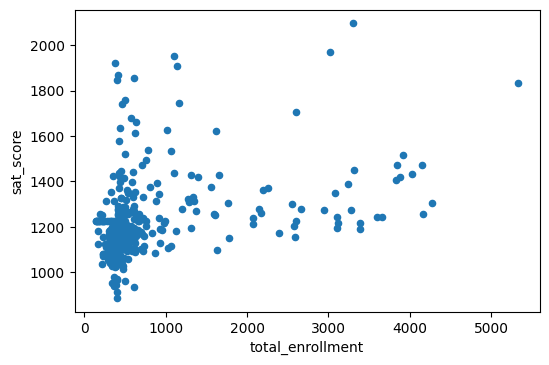

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

combined.plot.scatter(x='total_enrollment', y='sat_score')
plt.show()

**Judging from the plot above, it doesn't appear there's a strong correlation between sat_score and total_enrollment. But there is something interesting happening in the lower-left corner of the graph.**

In [48]:
low_enrollment = combined[(combined['total_enrollment'] < 1000) & (combined['sat_score'] < 1000)]
low_enrollment['School Name']

91       INTERNATIONAL COMMUNITY HIGH SCHOOL
125                                        0
126          BRONX INTERNATIONAL HIGH SCHOOL
139    KINGSBRIDGE INTERNATIONAL HIGH SCHOOL
141    INTERNATIONAL SCHOOL FOR LIBERAL ARTS
176                                        0
179            HIGH SCHOOL OF WORLD CULTURES
188       BROOKLYN INTERNATIONAL HIGH SCHOOL
225    INTERNATIONAL HIGH SCHOOL AT PROSPECT
237               IT TAKES A VILLAGE ACADEMY
253                MULTICULTURAL HIGH SCHOOL
286    PAN AMERICAN INTERNATIONAL HIGH SCHOO
Name: School Name, dtype: object

**After internet research it is revealed that most of the high schools with low total enrollment and low SAT scores have high percentages of English language learners (`ell_percent` column).**

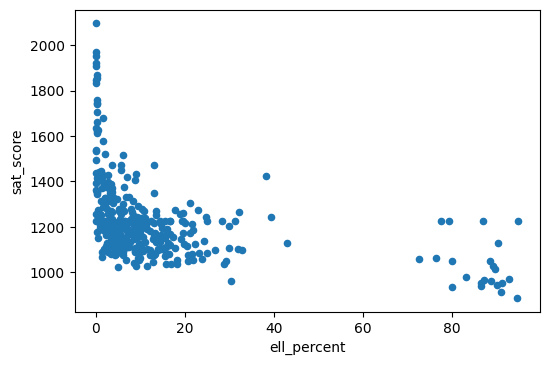

In [49]:
combined.plot.scatter(x='ell_percent', y='sat_score')
plt.show()

**To explain this granular statistic further, it is needed to aggregate these schools by districts.**

In [50]:
districts = combined.groupby('school_dist').agg(np.mean)
districts.reset_index(inplace=True)
districts

,school_dist,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5,Total Cohort,CSD,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO,schoolyear,fl_percent,frl_percent,total_enrollment,ell_num,ell_percent,sped_num,sped_percent,asian_num,asian_per,black_num,black_per,hispanic_num,...,N_s,N_t,N_p,saf_p_11,com_p_11,eng_p_11,aca_p_11,saf_t_11,com_t_11,eng_t_11,aca_t_11,saf_s_11,com_s_11,eng_s_11,aca_s_11,saf_tot_11,com_tot_11,eng_tot_11,aca_tot_11,grade_span_max,expgrade_span_max,zip,total_students,number_programs,priority08,priority09,priority10,lat,lon
0,01,441.833333,473.333333,439.333333,1354.500000,116.681090,173.019231,135.800000,93.500000,1.0,115.244241,5.148538,22.675415,18.798392,26.553044,0.0,20112012.0,0.0,58.983333,668.500000,42.166667,10.000000,82.000000,17.083333,134.500000,17.516667,125.500000,22.333333,214.833333,...,525.368056,38.500000,239.166667,8.233333,7.800000,7.683333,8.016667,7.066667,6.233333,6.700000,7.500000,6.768611,6.165787,6.736713,7.446898,7.433333,6.816667,7.116667,7.683333,12.0,12.0,10003.166667,659.500000,1.333333,0.0,0.0,0.0,40.719022,-73.982377
1,02,426.619092,444.186256,424.832836,1295.638184,128.908454,201.516827,157.495833,158.647849,2.0,149.818949,5.686360,25.038118,20.662667,28.593861,0.0,20112012.0,0.0,63.164583,605.604167,51.625000,13.006250,70.770833,13.212500,118.395833,14.479167,141.145833,24.733333,271.458333,...,495.171007,31.687500,190.000000,8.254167,7.495833,7.379167,7.704167,7.404167,6.520833,7.120833,7.564583,6.910660,6.204057,6.650422,7.385029,7.520833,6.720833,7.037500,7.541667,12.0,12.0,10023.770833,621.395833,1.416667,0.0,0.0,0.0,40.739699,-73.991386
2,03,428.529851,437.997512,426.915672,1293.443035,156.183494,244.522436,193.087500,183.384409,3.0,156.005994,5.839200,23.716311,19.737593,27.122831,0.0,20112012.0,0.0,58.050000,661.416667,36.916667,9.025000,63.583333,14.500000,68.000000,6.408333,181.833333,34.000000,228.250000,...,519.250000,28.166667,206.416667,8.316667,7.541667,7.508333,7.758333,6.675000,5.991667,6.533333,6.991667,6.716667,6.258333,6.633333,7.375000,7.233333,6.616667,6.891667,7.391667,12.0,12.0,10023.750000,717.916667,2.000000,0.0,0.0,0.0,40.781574,-73.977370
3,04,402.142857,416.285714,405.714286,1224.142857,129.016484,183.879121,151.035714,113.857143,4.0,132.362265,5.192610,24.101048,19.740816,27.460291,0.0,20112012.0,0.0,71.000000,569.285714,21.571429,4.557143,58.571429,13.214286,61.142857,6.128571,151.714286,30.028571,341.571429,...,504.857143,32.428571,193.142857,8.385714,7.657143,7.500000,7.928571,7.871429,7.042857,7.428571,7.885714,6.885714,6.114286,6.685714,7.571429,7.714286,6.942857,7.185714,7.785714,12.0,12.0,10029.857143,580.857143,1.142857,0.0,0.0,0.0,40.793449,-73.943215
4,05,427.159915,438.236674,419.666098,1285.062687,85.722527,115.725275,142.464286,143.677419,5.0,120.623901,4.845101,24.290247,20.447527,27.746703,0.0,20112012.0,0.0,58.671429,605.857143,21.571429,4.157143,59.714286,10.428571,32.714286,7.300000,342.571429,49.000000,195.571429,...,442.428571,27.714286,184.857143,8.085714,7.342857,7.357143,7.685714,6.857143,5.885714,6.242857,6.957143,6.314286,6.000000,6.428571,7.285714,7.085714,6.414286,6.671429,7.314286,12.0,12.0,10030.142857,609.857143,1.142857,0.0,0.0,0.0,40.817077,-73.949251
5,06,382.011940,400.565672,382.066269,1164.643881,108.711538,159.715385,105.425000,180.848387,6.0,139.041709,5.285860,25.324199,20.556126,29.217872,0.0,20112012.0,0.0,84.250000,621.800000,165.700000,30.040000,80.100000,14.950000,7.800000,0.810000,82.000000,11.470000,523.900000,...,482.300000,33.000000,261.500000,8.530000,7.990000,7.750000,8.050000,7.490000,6.610000,7.060000,7.660000,6.950000,6.150000,6.700000,7.510000,7.660000,6.920000,7.170000,7.760000,12.0,12.0,10036.200000,628.900000,1.300000,0.0,0.0,0.0,40.848970,-73.932502
6,07,376.461538,380.461538,371.92307

In [51]:
districts['sat_score'].sort_values()

11    1101.823134
18    1103.833333
17    1118.000000
31    1119.500000
15    1120.109701
6     1128.846154
8     1131.971940
22    1157.333333
7     1159.665129
16    1161.428571
5     1164.643881
10    1165.000000
13    1179.459915
28    1181.929851
14    1190.604312
20    1206.312619
9     1222.227273
3     1224.142857
26    1224.300000
12    1237.187600
23    1242.000000
19    1273.687761
4     1285.062687
2     1293.443035
1     1295.638184
29    1326.382090
27    1347.846947
0     1354.500000
24    1357.000000
25    1377.600000
30    1382.500000
21    1450.500000
Name: sat_score, dtype: float64

### Plotting Correlations ###

In [52]:
relevant_combined = combined[relevant_corrs.index]
survey_fields = relevant_combined.columns.drop('sat_score')
relevant_combined

,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5,Total Cohort,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF LARGEST CLASS,frl_percent,total_enrollment,ell_percent,sped_percent,asian_num,asian_per,black_per,hispanic_per,white_num,white_per,male_num,female_num,N_s,N_t,N_p,saf_t_11,saf_s_11,aca_s_11,saf_tot_11,total_students
0,355.0,404.0,363.0,1122.0,129.028846,197.038462,153.45,78.0,88.000000,4.000000,22.564286,26.571429,88.6,422,22.3,24.9,59,14.0,29.1,53.8,7,1.7,259.0,163.0,379.000000,26.0,151.0,6.3,6.000000,6.700000,6.7,323.0
1,383.0,423.0,366.0,1172.0,39.000000,49.000000,10.00,124.0,105.687500,4.750000,22.231250,27.062500,71.8,394,21.1,21.8,115,29.2,22.6,45.9,9,2.3,226.0,168.0,385.000000,37.0,46.0,6.6,6.000000,7.000000,6.8,299.0
2,377.0,402.0,370.0,1149.0,19.000000,21.000000,153.45,90.0,57.600000,2.733333,21.200000,22.866667,71.8,598,5.0,26.4,58,9.7,23.9,55.4,62,10.4,327.0,271.0,598.208333,42.0,150.0,7.3,6.611667,7.381389,7.9,649.0
3,390.0,433.0,384.0,1207.0,129.028846,197.038462,153.45,84.0,69.642857,3.000000,23.571429,27.357143,80.7,367,11.2,25.9,34,9.3,31.6,56.9,6,1.6,170.0,197.0,306.000000,29.0,69.0,6.4,6.400000,7.000000,6.9,401.0
4,522.0,574.0,525.0,1621.0,255.000000,377.000000,191.00,46.0,156.368421,6.157895,25.510526,31.210526,23.0,1613,0.2,2.7,448,27.8,11.7,14.2,725,44.9,794.0,819.0,923.000000,67.0,736.0,7.6,7.300000,7.700000,7.8,1725.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,384.0,409.0,361.0,1154.0,47.000000,64.000000,13.00,161.0,150.941176,6.411765,22.958824,28.529412,86.9,606,15.3,12.2,10,1.7,9.2,88.1,4,0.7,316.0,290.0,504.000000,28.0,205.0,5.8,6.400000,7.000000,6.7,513.0
359,348.0,353.0,334.0,1035.0,129.028846,197.038462,153.45,97.0,71.066667,3.266667,22.760000,25.866667,75.1,434,18.2,18.4,2,0.5,28.3,68.7,8,1.8,210.0,224.0,295.000000,30.0,160.0,7.3,6.500000,7.300000,7.3,416.0
360,342.0,364.0,354.0,1060.0,76.000000,100.000000,10.00,115.0,102.375000,4.312500,23.900000,28.000000,77.1,398,23.9,22.1,6,1.5,26.4,70.4,4,1.0,217.0,181.0,256.000000,17.0,127.0,6.4,6.400000,7.300000,6.9,313.0
361,428.0,465.0,422.0,1315.0,7.000000,8.000000,153.45,43.0,66.937500,3.812500,17.793750,21.625000,81.4,263,2.7,4.9,14,5.3,12.9,79.5,4,1.5,137.0,126.0,206.000000,13.0,80.0,9.6,8.900000,8.900000,9.3,333.0


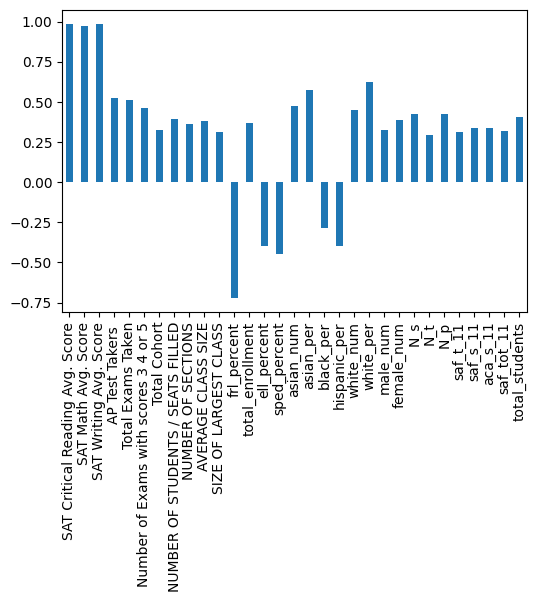

In [53]:
relevant_combined.corr()['sat_score'][survey_fields].plot.bar()
plt.show()

#### Racial Differences in SAT Scores ####

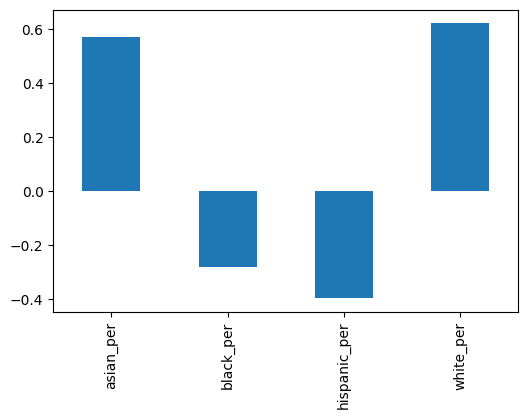

In [54]:
racial_perc = ['asian_per', 'black_per', 'hispanic_per', 'white_per']
relevant_combined.corr()['sat_score'][racial_perc].plot.bar()
plt.show()

**The graph above shows that higher percentage of white and asian students positively correlates with higher SAT scores, while there is a negative correlation between black and hispanic students on one side and SAT scores on the other.**

**The reason for that could be found in locations where the schools with higher percentage of black or hispanic students are situated.**

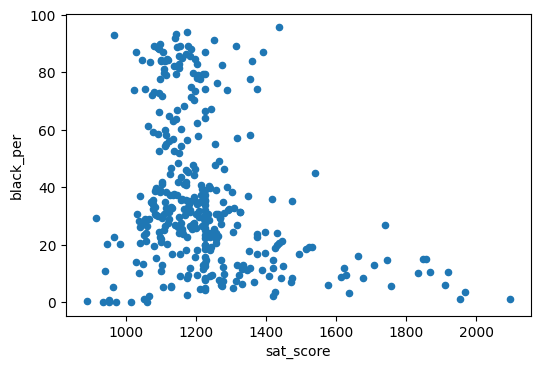

In [55]:
combined.plot.scatter('sat_score','black_per')
plt.show()

In [56]:
# possible safety reasons
black_schools = combined[combined['black_per'] > 80][['School Name', 'ell_percent', 'saf_t_11', 'saf_p_11', 'saf_s_11']]
black_schools['saf_mean'] = round((black_schools['saf_t_11'] + black_schools['saf_p_11'] + black_schools['saf_s_11'])/3, 1)
black_schools

,School Name,ell_percent,saf_t_11,saf_p_11,saf_s_11,saf_mean
190,ACORN COMMUNITY HIGH SCHOOL,2.9,6.0,7.6,6.0,6.5
192,BEDFORD ACADEMY HIGH SCHOOL,1.1,7.6,9.3,6.6,7.8
194,BENJAMIN BANNEKER ACADEMY,0.0,7.3,8.4,6.6,7.4
219,FREDERICK DOUGLASS ACADEMY IV SECONDA,1.4,6.2,7.9,6.1,6.7
220,BOYS AND GIRLS HIGH SCHOOL,2.5,5.9,7.1,6.1,6.4
223,ACADEMY FOR COLLEGE PREPARATION AND C,5.0,6.6,7.0,5.5,6.4
224,ACADEMY OF HOSPITALITY AND TOURISM,12.9,7.4,7.0,5.5,6.6
226,THE HIGH SCHOOL FOR GLOBAL CITIZENSHI,5.2,5.2,7.4,6.1,6.2
227,SCHOOL FOR HUMAN RIGHTS THE,6.2,9.0,8.6,6.8,8.1
228,SCHOOL FOR DEMOCRACY AND LEADERSHIP,3.7,5.0,7.5,5.6,6.0


#### Gender Differences in SAT Scores ####

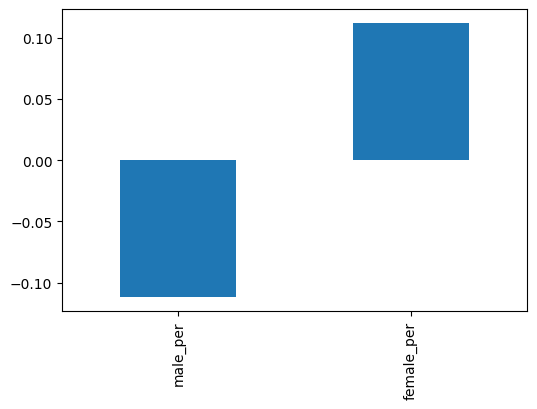

In [57]:
gender_per = ['male_per', 'female_per']
combined.corr()['sat_score'][gender_per].plot.bar()
plt.show()

In the plot above, we can see that a high percentage of females at a school positively correlates with SAT score, whereas a high percentage of males at a school negatively correlates with SAT score. Neither correlation is extremely strong.

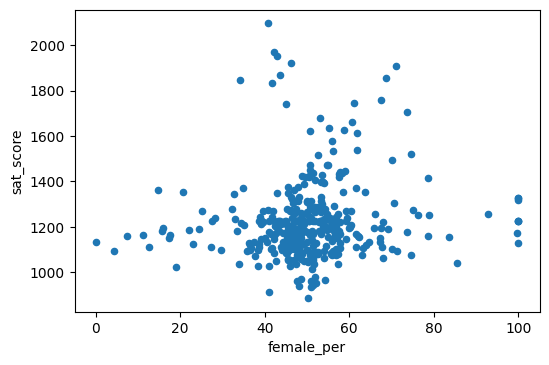

In [58]:
combined.plot.scatter('female_per', 'sat_score')
plt.show()

Based on the scatterplot, there doesn't seem to be any real correlation between `sat_score` and `female_per`. However, there is a cluster of schools with a high percentage of females (60 to 80), and high SAT scores.

In [59]:
combined[(combined['female_per'] > 60) & (combined['sat_score'] > 1700)]['SCHOOL NAME']

5                         BARD HIGH SCHOOL EARLY COLLEGE
26                         ELEANOR ROOSEVELT HIGH SCHOOL
60                                    BEACON HIGH SCHOOL
61     FIORELLO H. LAGUARDIA HIGH SCHOOL OF MUSIC & A...
302                          TOWNSEND HARRIS HIGH SCHOOL
Name: SCHOOL NAME, dtype: object

#### AP Exam Scores vs SAT Scores ####

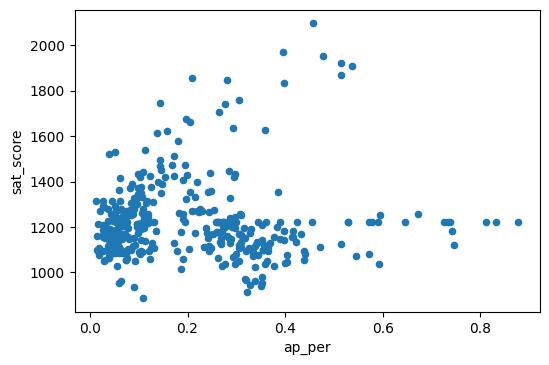

In [60]:
combined['ap_per'] = combined['AP Test Takers '] / combined['total_enrollment']
combined.plot.scatter('ap_per', 'sat_score')
plt.show()

It looks like there is a relationship between the percentage of students in a school who take the AP exam, and their average SAT scores. It's not an extremely strong correlation, though.

The abovementioned correlations should be investigated further by internet reasearch on type of schools in case, the boroughs in which the schools are situated, as well as some other metrics that could be of importance (e.g. class size, property values in neighbourhoods where the schools are etc.)